<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/vgg19_prod01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [17]:
import os
import random
import shutil

# Diretório de origem
diretorio_origem = '/content/PRODUTOS'

# Diretórios de destino
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Proporções de imagens para treinamento (60%), teste (20%) e validação (20%)
proporcao_treinamento = 0.6
proporcao_teste = 0.2
proporcao_validacao = 0.2

# Lista de subdiretórios no diretório de origem
subdiretorios = os.listdir(diretorio_origem)

# Crie os 25 diretórios em train, test e val
for subdir in subdiretorios:
    diretorio_treinamento_sub = os.path.join(diretorio_treinamento, subdir)
    diretorio_teste_sub = os.path.join(diretorio_teste, subdir)
    diretorio_validacao_sub = os.path.join(diretorio_validacao, subdir)

    os.makedirs(diretorio_treinamento_sub, exist_ok=True)
    os.makedirs(diretorio_teste_sub, exist_ok=True)
    os.makedirs(diretorio_validacao_sub, exist_ok=True)

# Função para copiar arquivos de um diretório para outro, mantendo a mesma estrutura de pastas
def copiar_com_estrutura(origem, destino, proporcao):
    arquivos = os.listdir(origem)
    random.shuffle(arquivos)
    num_arquivos = len(arquivos)
    num_destino = int(num_arquivos * proporcao)

    for arquivo in arquivos[:num_destino]:
        caminho_arquivo_origem = os.path.join(origem, arquivo)
        caminho_arquivo_destino = os.path.join(destino, arquivo)
        if os.path.isdir(caminho_arquivo_origem):
            os.makedirs(caminho_arquivo_destino, exist_ok=True)
            copiar_com_estrutura(caminho_arquivo_origem, caminho_arquivo_destino, proporcao)
        else:
            shutil.copy2(caminho_arquivo_origem, caminho_arquivo_destino)

# Distribua os arquivos com a mesma estrutura de pastas
for subdir in subdiretorios:
    diretorio_origem_sub = os.path.join(diretorio_origem, subdir)
    diretorio_treinamento_sub = os.path.join(diretorio_treinamento, subdir)
    diretorio_teste_sub = os.path.join(diretorio_teste, subdir)
    diretorio_validacao_sub = os.path.join(diretorio_validacao, subdir)

    copiar_com_estrutura(diretorio_origem_sub, diretorio_treinamento_sub, proporcao_treinamento)
    copiar_com_estrutura(diretorio_origem_sub, diretorio_teste_sub, proporcao_teste)
    copiar_com_estrutura(diretorio_origem_sub, diretorio_validacao_sub, proporcao_validacao)

print(f'Imagens copiadas com a mesma estrutura de pastas para treinamento, teste e validação.')


Imagens copiadas com a mesma estrutura de pastas para treinamento, teste e validação.


In [18]:
import os
import shutil
import random

# Diretórios de origem e destino
diretorio_base = '/content/PRODUTOS'
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Proporção de imagens para treinamento, teste e validação
proporcao_treinamento = 0.6
proporcao_teste = 0.2
proporcao_validacao = 0.2

# Função para dividir imagens aleatoriamente
def dividir_imagens(diretorio_origem, diretorio_destino, proporcao):
    arquivos = os.listdir(diretorio_origem)
    random.shuffle(arquivos)  # Embaralhar a ordem dos arquivos
    total_imagens = len(arquivos)

    # Calcular o número de imagens a serem copiadas
    num_imagens = int(total_imagens * proporcao)

    # Copiar as imagens
    for arquivo in arquivos[:num_imagens]:
        caminho_arquivo_origem = os.path.join(diretorio_origem, arquivo)
        caminho_arquivo_destino = os.path.join(diretorio_destino, arquivo)
        shutil.copy2(caminho_arquivo_origem, caminho_arquivo_destino)

# Criar diretórios de treinamento, teste e validação
os.makedirs(diretorio_treinamento, exist_ok=True)
os.makedirs(diretorio_teste, exist_ok=True)
os.makedirs(diretorio_validacao, exist_ok=True)

# Para cada subdiretório
for subdiretorio in os.listdir(diretorio_base):
    diretorio_origem = os.path.join(diretorio_base, subdiretorio)
    diretorio_treinamento_destino = os.path.join(diretorio_treinamento, subdiretorio)
    diretorio_teste_destino = os.path.join(diretorio_teste, subdiretorio)
    diretorio_validacao_destino = os.path.join(diretorio_validacao, subdiretorio)

    # Dividir as imagens aleatoriamente
    dividir_imagens(diretorio_origem, diretorio_treinamento_destino, proporcao_treinamento)
    dividir_imagens(diretorio_origem, diretorio_teste_destino, proporcao_teste)
    dividir_imagens(diretorio_origem, diretorio_validacao_destino, proporcao_validacao)

print('Imagens divididas aleatoriamente em treinamento, teste e validação.')


Imagens divididas aleatoriamente em treinamento, teste e validação.


In [19]:
import os
import shutil
import hashlib

# Diretórios de treinamento, teste e validação
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Função para calcular o hash de um arquivo
def calcular_hash(arquivo):
    if os.path.isfile(arquivo):  # Verifique se é um arquivo
        sha1 = hashlib.sha1()
        with open(arquivo, "rb") as f:
            while True:
                bloco = f.read(65536)
                if not bloco:
                    break
                sha1.update(bloco)
        return sha1.hexdigest()
    return None

# Função para verificar duplicatas
def verificar_duplicatas(diretorio1, diretorio2):
    duplicatas = []
    for arquivo1 in os.listdir(diretorio1):
        caminho_arquivo1 = os.path.join(diretorio1, arquivo1)
        hash_arquivo1 = calcular_hash(caminho_arquivo1)
        if hash_arquivo1 is None:
            continue  # Ignorar diretórios

        for arquivo2 in os.listdir(diretorio2):
            caminho_arquivo2 = os.path.join(diretorio2, arquivo2)
            hash_arquivo2 = calcular_hash(caminho_arquivo2)
            if hash_arquivo2 is None:
                continue  # Ignorar diretórios

            if hash_arquivo1 == hash_arquivo2:
                duplicatas.append((arquivo1, arquivo2))

    return duplicatas

# Verificar duplicatas entre treinamento e teste
duplicatas_treinamento_teste = verificar_duplicatas(diretorio_treinamento, diretorio_teste)
if duplicatas_treinamento_teste:
    print("Duplicatas entre treinamento e teste:")
    for duplicata in duplicatas_treinamento_teste:
        print(f"{duplicata[0]} em treinamento e {duplicata[1]} em teste")
else:
    print("Nenhuma duplicata encontrada entre treinamento e teste.")

# Verificar duplicatas entre treinamento e validação
duplicatas_treinamento_validacao = verificar_duplicatas(diretorio_treinamento, diretorio_validacao)
if duplicatas_treinamento_validacao:
    print("Duplicatas entre treinamento e validação:")
    for duplicata in duplicatas_treinamento_validacao:
        print(f"{duplicata[0]} em treinamento e {duplicata[1]} em validação")
else:
    print("Nenhuma duplicata encontrada entre treinamento e validação.")

# Verificar duplicatas entre teste e validação
duplicatas_teste_validacao = verificar_duplicatas(diretorio_teste, diretorio_validacao)
if duplicatas_teste_validacao:
    print("Duplicatas entre teste e validação:")
    for duplicata in duplicatas_teste_validacao:
        print(f"{duplicata[0]} em teste e {duplicata[1]} em validação")
else:
    print("Nenhuma duplicata encontrada entre teste e validação.")

Nenhuma duplicata encontrada entre treinamento e teste.
Nenhuma duplicata encontrada entre treinamento e validação.
Nenhuma duplicata encontrada entre teste e validação.


In [20]:
import os
import imgaug as ia
from imgaug import augmenters as iaa
import shutil
import cv2

# Diretórios
diretorio_origem = '/content/PRODUTOS'
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Lista de subdiretórios
subdiretorios = os.listdir(diretorio_origem)

# Augmenter para aumento de dados
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # Espelhar horizontalmente com 50% de probabilidade
    iaa.GaussianBlur(sigma=(0, 3.0)),  # Aplicar desfoque gaussiano
    iaa.Affine(rotate=(-25, 25)),  # Rotacionar a imagem
])

# Função para aplicar aumento de dados e copiar imagens
def aplicar_aumento_e_copiar(diretorio_origem, diretorio_destino, proporcao=0.2):
    arquivos = os.listdir(diretorio_origem)

    for arquivo in arquivos:
        caminho_arquivo_origem = os.path.join(diretorio_origem, arquivo)
        # Use OpenCV to read the image
        imagem = cv2.imread(caminho_arquivo_origem)

        num_aumentos = int(proporcao)
        for i in range(num_aumentos):
            imagem_aumentada = augmenter.augment_image(imagem)
            nome_arquivo = f'aumento_{i}_{arquivo}'
            caminho_arquivo_destino = os.path.join(diretorio_destino, nome_arquivo)
            # Use OpenCV to save the image
            cv2.imwrite(caminho_arquivo_destino, imagem_aumentada)

# Aplicar aumento de dados e copiar imagens para cada subdiretório
for subdiretorio in subdiretorios:
    diretorio_origem_completo = os.path.join(diretorio_origem, subdiretorio)
    diretorio_treinamento_completo = os.path.join(diretorio_treinamento, subdiretorio)
    diretorio_teste_completo = os.path.join(diretorio_teste, subdiretorio)
    diretorio_validacao_completo = os.path.join(diretorio_validacao, subdiretorio)

    # Aplicar aumento de dados e copiar imagens para cada diretório
    aplicar_aumento_e_copiar(diretorio_origem_completo, diretorio_treinamento_completo)
    aplicar_aumento_e_copiar(diretorio_origem_completo, diretorio_teste_completo)
    aplicar_aumento_e_copiar(diretorio_origem_completo, diretorio_validacao_completo)

print('Aumento de dados aplicado com sucesso.')

Aumento de dados aplicado com sucesso.


In [21]:
import os

# Função para calcular o total de imagens em um diretório
def contar_imagens_em_diretorio(diretorio):
    total_imagens = 0
    for raiz, _, arquivos in os.walk(diretorio):
        for arquivo in arquivos:
            if arquivo.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                total_imagens += 1
    return total_imagens

# Diretórios a serem verificados
diretorio_produtos = '/content/PRODUTOS'  # Diretório original sem aumento
diretorio_val = '/content/val'
diretorio_train = '/content/train'
diretorio_test = '/content/test'

# Calcular o total de imagens no diretório original (antes do aumento)
total_imagens_produtos = contar_imagens_em_diretorio(diretorio_produtos)

# Aplicar o aumento de dados nos diretórios de treinamento, teste e validação

# Calcular o total de imagens após o aumento
total_imagens_val = contar_imagens_em_diretorio(diretorio_val)
total_imagens_train = contar_imagens_em_diretorio(diretorio_train)
total_imagens_test = contar_imagens_em_diretorio(diretorio_test)

# Exibir os totais
print(f'Total de imagens em {diretorio_produtos} (antes do aumento): {total_imagens_produtos}')
print(f'Total de imagens em {diretorio_val} (após o aumento): {total_imagens_val}')
print(f'Total de imagens em {diretorio_train} (após o aumento): {total_imagens_train}')
print(f'Total de imagens em {diretorio_test} (após o aumento): {total_imagens_test}')

Total de imagens em /content/PRODUTOS (antes do aumento): 4947
Total de imagens em /content/val (após o aumento): 1763
Total de imagens em /content/train (após o aumento): 4157
Total de imagens em /content/test (após o aumento): 1769


In [33]:
# Caminho para os diretórios de treinamento, validação e teste
test_path = '/content/test'
train_path = '/content/train'
val_path = '/content//val'

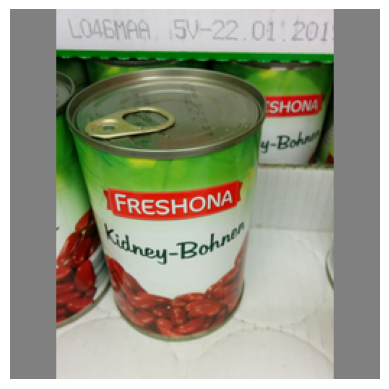

In [36]:
img = load_img(train_path + "/BEANS/BEANS0000.png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [37]:
x = img_to_array(img)
print(x.shape)

(256, 256, 3)


In [38]:
numberOfClass = len(glob(train_path + "/*"))
numberOfClass

25

In [39]:
vgg = VGG16()

In [ ]:
print(vgg.summary())

In [41]:
print(type(vgg))

<class 'keras.src.engine.functional.Functional'>


In [42]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.src.engine.input_layer.InputLayer object at 0x7b8b82b85030>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b82b3df00>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b82b3e140>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b8b950b7250>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b82b3dd50>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b950b5f00>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b8b808e0490>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b811d3280>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b808e0ee0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b808e1cc0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b8b808e2ef0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b808e3760>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b8b808e3fa0>, <keras.src.layers.convolutional.co

In [43]:
len(vgg_layer_list)

23

In [44]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [45]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [46]:
for layers in model.layers:
    layers.trainable = False

model.add(Dense(numberOfClass, activation = "softmax"))

print(model.summary())

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [47]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), class_mode='categorical')
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), class_mode='categorical')
batch_size = 32

Found 4157 images belonging to 25 classes.
Found 1769 images belonging to 25 classes.


In [48]:
hist = model.fit_generator(train_data,
                          steps_per_epoch = 1600 // batch_size,
                          epochs =5,
                          validation_data = test_data,
                          validation_steps = 800 // batch_size)

<ipython-input-48-9cfec1afa19a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/5
50/50 [==============================] - 1465s 29s/step - loss: 3.0634 - accuracy: 0.2781 - val_loss: 1.7697 - val_accuracy: 0.5175
Epoch 2/5
50/50 [==============================] - 1444s 29s/step - loss: 1.8553 - accuracy: 0.4863 - val_loss: 1.4489 - val_accuracy: 0.5813
Epoch 3/5
50/50 [==============================] - 1510s 30s/step - loss: 1.4174 - accuracy: 0.5924 - val_loss: 1.1038 - val_accuracy: 0.6662
Epoch 4/5
50/50 [==============================] - 1435s 29s/step - loss: 1.2612 - accuracy: 0.6381 - val_loss: 1.2056 - val_accuracy: 0.6375
Epoch 5/5
50/50 [==============================] - 1454s 29s/step - loss: 1.0311 - accuracy: 0.6988 - val_loss: 1.0089 - val_accuracy: 0.7287


In [49]:
model.save_weights("model_prod_v2.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


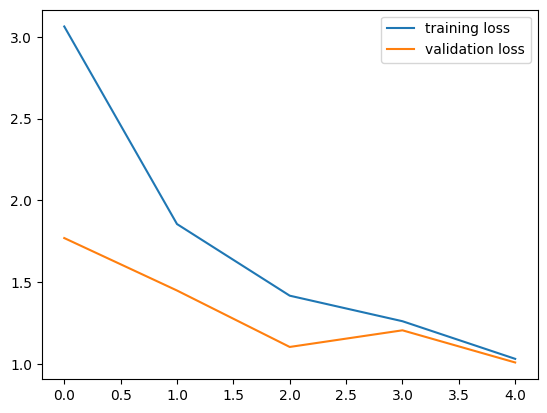

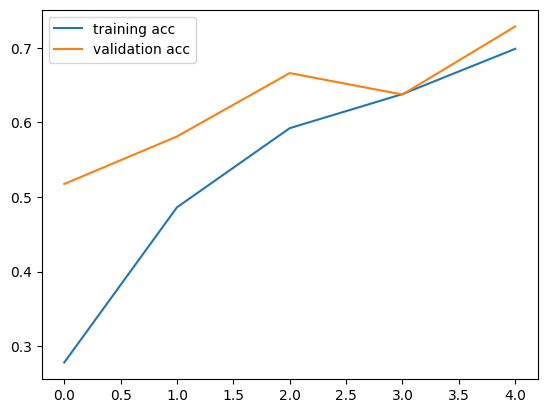

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [50]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "training loss")
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "training acc")
plt.plot(hist.history["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()

In [53]:
import json, codecs

with open("model_model_prod_v2.json","w") as f:
    json.dump(hist.history,f)

In [55]:
with codecs.open("model_model_prod_v2.json","r",encoding= "utf-8") as f:
    n = json.loads(f.read())

In [57]:
with codecs.open("model_model_prod_v2.json","r",encoding= "utf-8") as f:
    n = json.loads(f.read())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


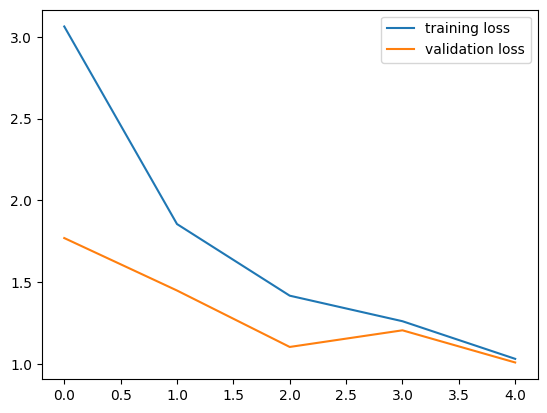

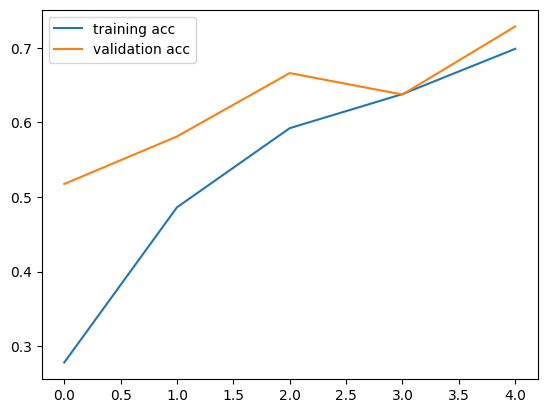

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [58]:
print(hist.history.keys())
plt.plot(n["loss"], label = "training loss")
plt.plot(n["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"], label = "training acc")
plt.plot(n["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()

In [59]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Valores reais e previsões (exemplo)
valores_reais = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
previsoes = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(valores_reais, previsoes)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
[[3 2]
 [1 4]]


In [60]:
from sklearn.metrics import confusion_matrix

# Defina a matriz de confusão
matriz_confusao = [[3, 2], [1, 4]]

# Extrair os valores da matriz de confusão
vp = matriz_confusao[0][0]
fp = matriz_confusao[0][1]
fn = matriz_confusao[1][0]
vn = matriz_confusao[1][1]

# Calcular a precisão
precisao = vp / (vp + fp)

# Calcular a revocação (recall)
revocacao = vp / (vp + fn)

# Calcular o F1-Score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)

# Imprimir as métricas
print("Precisão (Precision):", precisao)
print("Revocação (Recall):", revocacao)
print("F1-Score:", f1_score)


Precisão (Precision): 0.6
Revocação (Recall): 0.75
F1-Score: 0.6666666666666665


In [63]:
!pip install gTTS
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow
from gtts import gTTS
import IPython.display as ipd

# Caminho para a imagem de teste
caminho_imagem_teste = '/content/val/CHOCOLATE/CHOCOLATE0014.png'  # Substitua pelo caminho da sua imagem de teste

# Ler a imagem de teste
image = cv2.imread(caminho_imagem_teste)

# Redimensionar a imagem para o tamanho esperado pela VGG16
image_resized = cv2.resize(image, (224, 224))

# Adicionar a dimensão do lote (batch)
image_resized = np.expand_dims(image_resized, axis=0)

# Pré-processamento específico da VGG16
image_preprocessed = preprocess_input(image_resized)

# Carregar o modelo VGG16
model = VGG16(weights='imagenet')

# Fazer a previsão usando o modelo VGG16
predicted_label = model.predict(image_preprocessed)

# Decodificar o rótulo previsto para obter as principais previsões
predicted_labels = decode_predictions(predicted_label, top=3)[0]

# Exibir as previsões
for i, (imagenet_id, label, score) in enumerate(predicted_labels):
    print(f"Previsão {i + 1}: {label} ({score:.2f})")

# Gerar o arquivo de áudio com o nome do produto previsto
predicted_class = predicted_labels[0][1]  # Usando a previsão principal
tts = gTTS(text=f'O produto é {predicted_class}', lang='pt')
tts.save('/content/prevision.mp3')

# Reproduzir o arquivo de áudio
ipd.Audio('/content/prevision.mp3')


1/1 [==============================] - 1s 739ms/step
Previsão 1: ballpoint (0.12)
Previsão 2: ski (0.11)
Previsão 3: pencil_box (0.10)
